In [1]:
from binance.client import Client
import pandas as pd
import mplfinance as mpf
from datetime import datetime, timezone
from dotenv import load_dotenv
import os

In [2]:
#initialize our Binance client
load_dotenv()

API_KEY = os.getenv("API_KEY")
SECRET_KEY = os.getenv("SECRET_KEY")

client = Client(API_KEY, SECRET_KEY, testnet=True)

In [3]:
#get the time in miliseconds

dt1 = datetime(2025, 9, 16, 11, 0, 0, tzinfo=timezone.utc)
start_utc = dt1.timestamp()

dt2 = datetime(2025, 9, 23, 11, 0, 0, tzinfo=timezone.utc)
end_utc = dt2.timestamp()

start_ms = int(start_utc) * 1000
end_ms = int (end_utc) * 1000

In [4]:

#getting the relevant kline data
historical_klines = client.get_historical_klines(symbol="BTCUSDT",interval = Client.KLINE_INTERVAL_30MINUTE, start_str=start_ms, end_str=end_ms)


#stroing data
timestamps = []
opens = []
highs = []
lows = []
closes = []

for kline in historical_klines: 
    timestamps.append(datetime.fromtimestamp(int(kline[0]) / 1000)) #because Binance gives us miliseconds we divide
    opens.append(float(kline[1]))
    highs.append(float(kline[2]))
    lows.append(float(kline[3]))
    closes.append(float(kline[4]))

In [5]:
#creating a DataFrame for our OHLC data
ohlc_data = { "Open" : opens, 
              "High" : highs,
              "Low" : lows,
              "Close" : closes
            }

df = pd.DataFrame(ohlc_data)
df['Timestamp'] = timestamps
df.set_index('Timestamp', inplace=True)
df = df.loc[~df.index.duplicated(keep='first')]
df

,Open,High,Low,Close
Timestamp,,,,
2025-09-16 11:00:00,115835.56,115974.23,115755.28,115755.28
2025-09-16 11:30:00,115755.28,115755.28,115113.10,115658.75
2025-09-16 12:00:00,115658.75,115720.00,115602.93,115602.94
2025-09-16 12:30:00,115600.00,115624.02,114967.54,115477.27
2025-09-16 13:00:00,115477.28,115590.49,115408.47,115511.04
...,...,...,...,...
2025-09-23 09:00:00,112665.43,112945.53,110456.90,112902.67
2025-09-23 09:30:00,112902.68,114550.71,112697.54,112963.03
2025-09-23 10:00:00,112963.04,113068.78,112882.48,112944.51


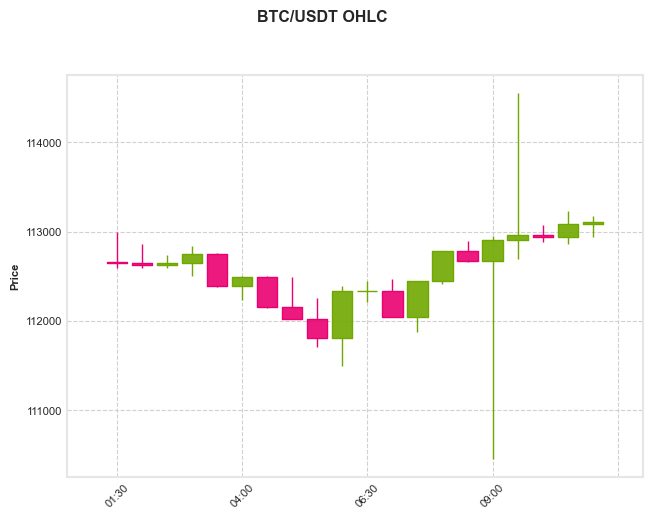

In [6]:
#making a candlestick chart/graph

style = mpf.make_mpf_style(base_mpf_style='binance', rc={'font.size': 8})


chart = mpf.plot(df[-20:], type = "candle", style = style,  title = "BTC/USDT OHLC", scale_width_adjustment=dict(candle=1.25))